## Table of Contents
- [1 - Packages](#1)
- [2 - Data Prepocessing for Decision Tree and Random Forest](#2)
- [3 - Machine Learning](#3)
    - [3.1 - Decision Tree](#3-1)
    - [3.2 - Random Forest](#3-2)
- [4 - Deep Learning](#4)
    - [4.1 - Data Proprecessing for ResNetViT](#4-1)
    - [4.2 - identity_block of ResNet](#4-2)
    - [4.3 - convolutional_block of ResNet](#4-3)
    - [4.4 - ResNetViT](#4-4)
    - [4.5 - ResNetViT with Dropout](#4-5)
- [5 - Random Show Prediction](#5)

<a name='1'></a>
## 1 - Packages

In [1]:
import numpy as np
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.initializers import glorot_uniform
import keras.backend as K
K.set_image_data_format('channels_last')
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.image import resize
from transformers import ViTModel, ViTImageProcessor
import torch
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

d:\Anaconda\envs\AIFP\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
d:\Anaconda\envs\AIFP\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

<a name='2'></a>
## 2 - Data Prepocessing for Decision Tree and Random Forest

In [2]:
# Load Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Flatten image data for decision tree (28x28 images flattened into 1x784 one-dimensional arrays)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

11490434/11490434 [==============================] - 2s 0us/step


<a name='3.1'></a>
## 3.1 - Decision Tree

In [3]:
# Train decision tree classifier
decisionTree = DecisionTreeClassifier(criterion='entropy',random_state=42)
decisionTree.fit(X_train_flattened, Y_train)

# Predict on Test Set
Y_pred = decisionTree.predict(X_test_flattened)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Decision Tree Classifier Accuracy: {accuracy}")

Decision Tree Classifier Accuracy: 0.8855


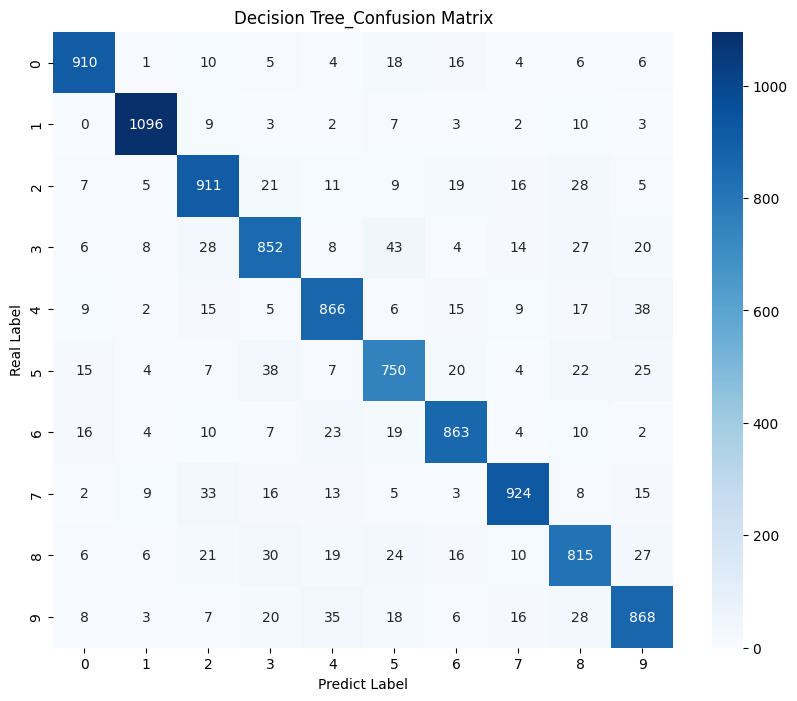

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       980
           1       0.96      0.97      0.96      1135
           2       0.87      0.88      0.87      1032
           3       0.85      0.84      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.83      0.84      0.84       892
           6       0.89      0.90      0.90       958
           7       0.92      0.90      0.91      1028
           8       0.84      0.84      0.84       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



In [4]:
# Compute Confusion_matrix
conMatrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predict Label')
plt.ylabel('Real Label')
plt.title('Decision Tree_Confusion Matrix')
plt.show()

# Classification report
print(f'Classification Report: \n{classification_report(Y_test, Y_pred)}')

<a name='3.2'></a>
## 3.2 - Random Forest

In [5]:
# Train Random Forest classifier
ranForest = RandomForestClassifier(n_estimators=100, random_state=42)
ranForest.fit(X_train_flattened, Y_train)

# Predict on Test Set
Y_pred = ranForest.predict(X_test_flattened)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print(f"Random Forest Classifier Accuracy: {accuracy}")

Random Forest Classifier Accuracy: 0.9705


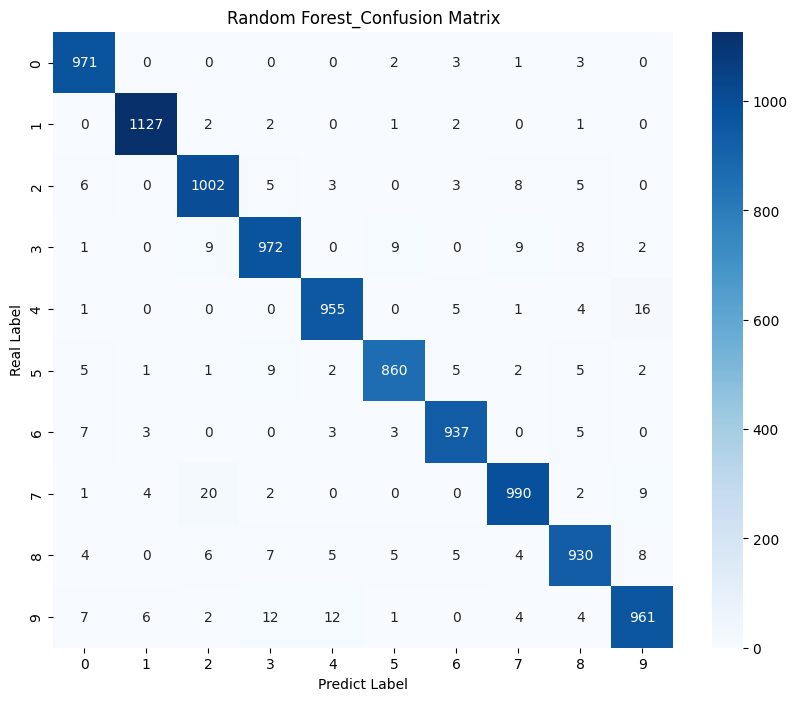

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [6]:
# Compute Confusion_matrix
conMatrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predict Label')
plt.ylabel('Real Label')
plt.title('Random Forest_Confusion Matrix')
plt.show()

# Classification report
print(f'Classification Report: \n{classification_report(Y_test, Y_pred)}')

<a name='4.1'></a>
## 4.1 - Data Proprecessing for ResNetViT

In [7]:
def load_and_preprocess_data():
    """
    Load and preprocess the MNIST dataset for image classification.
    
    Returns:
    X_train, Y_train: Preprocessed training data and labels
    X_test, Y_test: Preprocessed test data and labels
    """
    # Load the MNIST dataset
    (X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()
    
    # Expand dimensions: Convert grayscale images to 3D arrays (height, width, 1)
    X_train_orig = np.expand_dims(X_train_orig, axis=-1)
    X_test_orig = np.expand_dims(X_test_orig, axis=-1)
    
    # Repeat the grayscale channel 3 times to create RGB images (height, width, 3)
    X_train_orig = np.repeat(X_train_orig, 3, axis=-1)
    X_test_orig = np.repeat(X_test_orig, 3, axis=-1)
    
    # Resize all images to 64x64
    X_train = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_train_orig])
    X_test = np.array([tf.image.resize(img, (64, 64)).numpy() for img in X_test_orig])
    
    # Normalize pixel values to the range 0-1
    X_train = X_train / 255.
    X_test = X_test / 255.
    
    # Convert labels to one-hot encoded format
    Y_train = to_categorical(Y_train_orig, 10)
    Y_test = to_categorical(Y_test_orig, 10)
    
    # Return the preprocessed training and test data
    return X_train, Y_train, X_test, Y_test

<a name='4.2'></a>
## 4.2 - identity_block of ResNet

<img src="image/idblock3_kiank.png" style="width:650px;height:150px;">

In [8]:
def identity_block(X, f, filters, stage, block):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X

<a name='4.3'></a>
## 4.3 - convolutional_block of ResNet

<img src="image/convblock_kiank.png" style="width:650px;height:150px;">

In [9]:
def convolutional_block(X, f, filters, stage, block, s=2):

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    # First component of main path 
    X = Conv2D(F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path 
    X = Conv2D(F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### Short Path
    X_shortcut = Conv2D(F3, (1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X) 
    return X

<a name='4.4'></a>
## 4.4 - ResNet_ViT

In [10]:
class CombineResNetViT:
    def __init__(self, input_shape=(64, 64, 3), classes=10, vit_model_name="google/vit-base-patch16-224-in21k"):
        # Load the ViT image processor and model from Hugging Face
        self.vit_processor = ViTImageProcessor.from_pretrained(vit_model_name)
        self.vit_model = ViTModel.from_pretrained(vit_model_name)
        
        # Define the ResNet50 part
        self.resnet = self.build_resnet(input_shape, classes)
        
        # Define output classes
        self.classes = classes
        
    def build_resnet(self, input_shape, classes):
        X_input = Input(input_shape)
        X = ZeroPadding2D((3, 3))(X_input)
        X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis=3, name='bn_conv1')(X)
        X = Activation('relu')(X)
        X = MaxPooling2D((3, 3), strides=(2, 2))(X)
        
        # Stage 2
        X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
        X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
        X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
        
        # Stage 3
        X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
        
        # Stage 4
        X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
        
        # Stage 5
        X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
        X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
        X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
        
        # Average Pooling
        X = AveragePooling2D((2, 2), name='avg_pool')(X)
        
        # Flatten
        X = Flatten()(X)
        X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
        
        model = Model(inputs=X_input, outputs=X, name='ResNet50')
        return model
    
    def forward(self, X):
        # Preprocess input using ViT processor
        X_vit_processed = [self.vit_processor(images=img, return_tensors="pt") for img in X]
        X_vit_features = [self.vit_model(**inputs).last_hidden_state[:, 0, :] for inputs in X_vit_processed]
        
        # Convert ViT features to numpy
        X_vit_features = np.array([feat.detach().numpy() for feat in X_vit_features])
        
        # Extract ResNet features
        X_resnet_features = self.resnet.predict(X)
        
        # Concatenate ResNet and ViT features
        hybrid_features = np.concatenate([X_resnet_features, X_vit_features], axis=1)
        
        # Return concatenated features for further processing or classification
        return hybrid_features


In [11]:
def train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Train and evaluate the model
    history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')
    plt.show()

In [12]:
# Instantiate and compile the hybrid model
hybrid_model = CombineResNetViT(input_shape=(64, 64, 3), classes=10)
model = hybrid_model.resnet
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

d:\Anaconda\envs\AIFP\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\36185\.cache\huggingface\hub\models--google--vit-base-patch16-224-in21k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [13]:
# Load data
X_train, Y_train, X_test, Y_test = load_and_preprocess_data()

Epoch 1/5
1875/1875 [==============================] - 84s 36ms/step - loss: 0.2034 - accuracy: 0.9464 - val_loss: 0.1326 - val_accuracy: 0.9605
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1263 - accuracy: 0.9697 - val_loss: 0.1145 - val_accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0934 - accuracy: 0.9774 - val_loss: 0.0441 - val_accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1035 - accuracy: 0.9744 - val_loss: 0.0388 - val_accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.0443 - val_accuracy: 0.9868


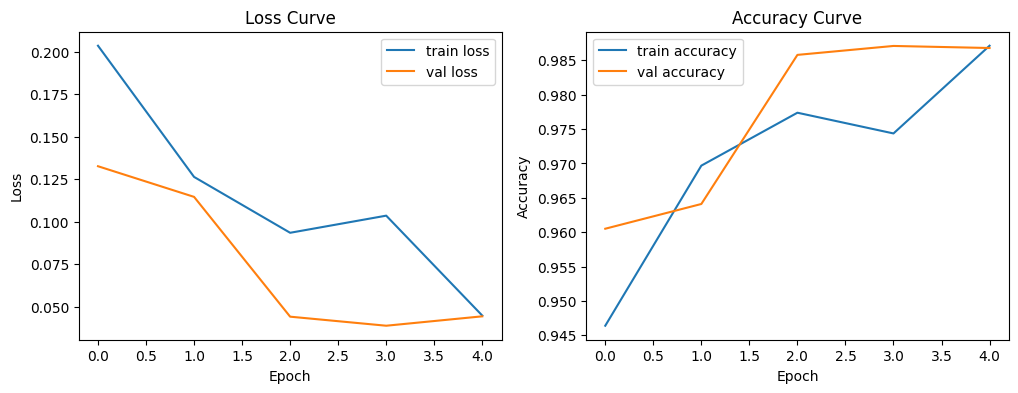

In [14]:
# Train and evaluate the model
train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test)

In [15]:
model.save("resnet_vit_model.h5")

<a name='4.5'></a>
## 4.5 - ResNet_ViT_Dropout

In [16]:
class HybridResNetViTDropout:
    def __init__(self, input_shape=(64, 64, 3), classes=10, vit_model_name="google/vit-base-patch16-224-in21k"):
        # Load the ViT image processor and model from Hugging Face
        self.vit_processor = ViTImageProcessor.from_pretrained(vit_model_name)
        self.vit_model = ViTModel.from_pretrained(vit_model_name)
        
        # Define the ResNet50 part
        self.resnet = self.build_resnet(input_shape, classes)
        
        # Define output classes
        self.classes = classes
        
    def build_resnet(self, input_shape, classes):
        """
        Implementation of the ResNet50 as described above.
        """
        X_input = Input(input_shape)
        X = ZeroPadding2D((3, 3))(X_input)
        X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
        X = BatchNormalization(axis=3, name='bn_conv1')(X)
        X = Activation('relu')(X)
        X = MaxPooling2D((3, 3), strides=(2, 2))(X)
        
        # Stage 2
        X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
        X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
        X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
        
        # Stage 3
        X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
        X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
        
        # Stage 4
        X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
        X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
        
        # Stage 5
        X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
        X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
        X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
        
        # Average Pooling
        X = AveragePooling2D((2, 2), name='avg_pool')(X)
        
        # Dropout layer to prevent overfitting
        X = Dropout(0.5)(X)
        
        # Output layer
        X = Flatten()(X)
        X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
        
        model = Model(inputs=X_input, outputs=X, name='ResNet50')
        return model
    
    def forward(self, X):
        # Preprocess input using ViT processor
        X_vit_processed = [self.vit_processor(images=img, return_tensors="pt") for img in X]
        X_vit_features = [self.vit_model(**inputs).last_hidden_state[:, 0, :] for inputs in X_vit_processed]
        
        # Convert ViT features to numpy
        X_vit_features = np.array([feat.detach().numpy() for feat in X_vit_features])
        
        # Concatenate ViT and ResNet features
        X_resnet_features = self.resnet.predict(X)
        hybrid_features = np.concatenate([X_resnet_features, X_vit_features], axis=1)
        
        # Return concatenated features for further processing or classification
        return hybrid_features

In [18]:
# Instantiate and compile the hybrid model
hybrid_model = HybridResNetViTDropout(input_shape=(64, 64, 3), classes=10)
model = hybrid_model.resnet
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Load data
X_train, Y_train, X_test, Y_test = load_and_preprocess_data()

In [ ]:
# Train and evaluate the model
train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test)

<a name='5'></a>
## 5 - Random Show Prediction

In [34]:
def display_random_predictions(model, X_test, Y_test, class_names):
    indices = np.random.choice(range(X_test.shape[0]), 5, replace=False)
    plt.figure(figsize=(15, 5))
    
    for i, idx in enumerate(indices):
        img = X_test[idx]
        true_label = np.argmax(Y_test[idx])  
        prediction = model.predict(np.expand_dims(img, axis=0))  
        predicted_label = np.argmax(prediction)  
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
        plt.axis('off')
    
    plt.show()

1/1 [==============================] - 0s 18ms/step


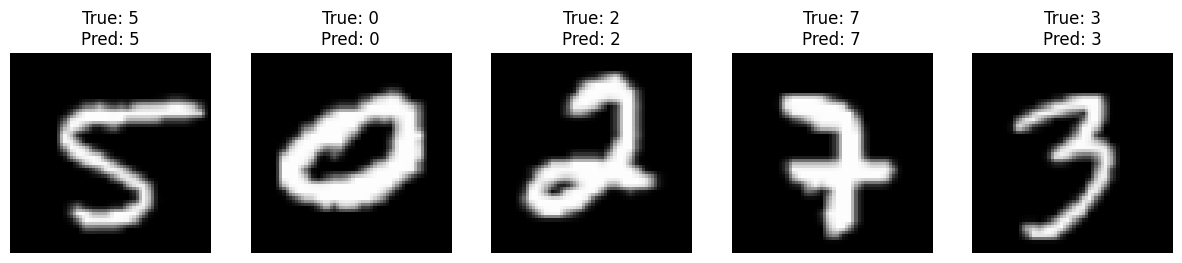

In [35]:
classes = [str(i) for i in range(10)]
display_random_predictions(model, X_test, Y_test, classes)